In [1]:
!pip install fast_ml --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 675 kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1000)
from fast_ml.utilities import display_all
from fast_ml import eda

Datset Initialization

In [3]:
mortage_dataset = pd.read_csv('/content/loan_level_500k.csv', index_col=19, low_memory=False)

In [4]:
type(mortage_dataset)

pandas.core.frame.DataFrame

Taking 5 rows of datset using head() function

In [5]:
mortage_dataset.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,200206,N,202901,NaN,0.0,1,O,80,33.0,162000,80,7.120,R,N,FRM,WV,SF,26100.0,P,320.0,2.0,Other sellers,Other servicers,True,False
F199Q1000005,732.0,199904,N,202903,17140.0,0.0,1,O,25,10.0,53000,25,6.500,R,N,FRM,OH,SF,45200.0,N,360.0,1.0,Other sellers,Other servicers,True,False
F199Q1000007,679.0,200208,N,202902,15940.0,30.0,1,O,91,48.0,133000,91,6.750,R,N,FRM,OH,SF,44700.0,P,319.0,1.0,Other sellers,Other servicers,True,False
F199Q1000013,721.0,200209,N,202902,38060.0,0.0,1,O,39,13.0,174000,39,6.625,T,N,FRM,AZ,SF,85200.0,N,318.0,2.0,Other sellers,Other servicers,True,False
F199Q1000015,618.0,200210,N,202902,10420.0,25.0,1,O,85,24.0,122000,85,6.375,R,N,FRM,OH,SF,44200.0,N,317.0,2.0,Other sellers,Other servicers,True,False


In [6]:
mortage_dataset.shape

(44030, 26)

In [7]:
sns.set_style('darkgrid')

In [8]:
mortage_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44030 entries, F199Q1000004 to nan
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CREDIT_SCORE                      43885 non-null  float64
 1   FIRST_PAYMENT_DATE                44030 non-null  int64  
 2   FIRST_TIME_HOMEBUYER_FLAG         29195 non-null  object 
 3   MATURITY_DATE                     44030 non-null  int64  
 4   METROPOLITAN_STATISTICAL_AREA     37991 non-null  float64
 5   MORTGAGE_INSURANCE_PERCENTAGE     25990 non-null  float64
 6   NUMBER_OF_UNITS                   44030 non-null  int64  
 7   OCCUPANCY_STATUS                  44030 non-null  object 
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE   44030 non-null  int64  
 9   ORIGINAL_DEBT_TO_INCOME_RATIO     43840 non-null  float64
 10  ORIGINAL_UPB                      44030 non-null  int64  
 11  ORIGINAL_LOAN_TO_VALUE            44030 non-null  int64  
 12  

In [9]:
mortage_dataset.describe()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS
count,43885.00000,44030.000000,44030.000000,37991.000000,25990.000000,44030.000000,44030.000000,43840.000000,44030.000000,44030.000000,44030.000000,44029.000000,44029.000000,44028.000000
mean,713.07547,199904.144810,202901.744061,30833.843858,11.121855,1.025301,74.840086,30.573996,126825.096525,74.756484,6.926468,58493.202208,359.844398,1.667734
std,50.88205,7.566527,18.679312,11311.586590,13.191322,0.205967,15.178250,11.069926,54310.557446,15.122068,0.313052,30238.199558,2.243263,0.471031
min,475.00000,199901.000000,202402.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8000.000000,6.000000,5.750000,600.000000,301.000000,1.000000
25%,678.00000,199903.000000,202902.000000,19740.000000,0.000000,1.000000,68.000000,22.000000,84250.000000,68.000000,6.750000,32900.000000,360.000000,1.000000
50%,720.00000,199904.000000,202903.000000,33460.000000,0.000000,1.000000,79.000000,30.000000,119000.000000,79.000000,6.875000,59700.000000,360.000000,2.000000
75%,753.00000,199905.000000,202904.000000,40484.000000,25.000000,1.000000,84.000000,38.000000,163000.000000,82.000000,7.065000,89100.000000,360.000000,2.000000
max,829.00000,200305.000000,203012.000000,49740.000000,36.000000,4.000000,110.000000,65.000000,461000.000000,97.000000,9.750000,99900.000000,360.000000,2.000000


In [10]:
#no of missing value in dataset
mortage_dataset.isnull().sum()

CREDIT_SCORE                          145
FIRST_PAYMENT_DATE                      0
FIRST_TIME_HOMEBUYER_FLAG           14835
MATURITY_DATE                           0
METROPOLITAN_STATISTICAL_AREA        6039
MORTGAGE_INSURANCE_PERCENTAGE       18040
NUMBER_OF_UNITS                         0
OCCUPANCY_STATUS                        0
ORIGINAL_COMBINED_LOAN_TO_VALUE         0
ORIGINAL_DEBT_TO_INCOME_RATIO         190
ORIGINAL_UPB                            0
ORIGINAL_LOAN_TO_VALUE                  0
ORIGINAL_INTEREST_RATE                  0
CHANNEL                                 0
PREPAYMENT_PENALTY_MORTGAGE_FLAG     1319
PRODUCT_TYPE                            1
PROPERTY_STATE                          1
PROPERTY_TYPE                           1
POSTAL_CODE                             1
LOAN_PURPOSE                            1
ORIGINAL_LOAN_TERM                      1
NUMBER_OF_BORROWERS                     2
SELLER_NAME                             1
SERVICER_NAME                     

In [11]:
mortage_dataset = mortage_dataset.dropna()

In [12]:
#no of missing value in dataset
mortage_dataset.isnull().sum()

CREDIT_SCORE                        0
FIRST_PAYMENT_DATE                  0
FIRST_TIME_HOMEBUYER_FLAG           0
MATURITY_DATE                       0
METROPOLITAN_STATISTICAL_AREA       0
MORTGAGE_INSURANCE_PERCENTAGE       0
NUMBER_OF_UNITS                     0
OCCUPANCY_STATUS                    0
ORIGINAL_COMBINED_LOAN_TO_VALUE     0
ORIGINAL_DEBT_TO_INCOME_RATIO       0
ORIGINAL_UPB                        0
ORIGINAL_LOAN_TO_VALUE              0
ORIGINAL_INTEREST_RATE              0
CHANNEL                             0
PREPAYMENT_PENALTY_MORTGAGE_FLAG    0
PRODUCT_TYPE                        0
PROPERTY_STATE                      0
PROPERTY_TYPE                       0
POSTAL_CODE                         0
LOAN_PURPOSE                        0
ORIGINAL_LOAN_TERM                  0
NUMBER_OF_BORROWERS                 0
SELLER_NAME                         0
SERVICER_NAME                       0
PREPAID                             0
DELINQUENT                          0
dtype: int64

In [13]:
mortage_dataset.ORIGINAL_DEBT_TO_INCOME_RATIO

LOAN_SEQUENCE_NUMBER
F199Q1000005    10.0
F199Q1000007    48.0
F199Q1000013    13.0
F199Q1000015    24.0
F199Q1000016    44.0
                ... 
F199Q1089822    17.0
F199Q1089824    36.0
F199Q1089825    10.0
F199Q1089826    22.0
F199Q1089827    19.0
Name: ORIGINAL_DEBT_TO_INCOME_RATIO, Length: 16157, dtype: float64

In [14]:
def get_plot_and_stat(series):
    series.plot.box(vert=False)
    print(f"Med:{series.median()}, mean{series.mean()}")

Med:718.0, mean712.5911988611747


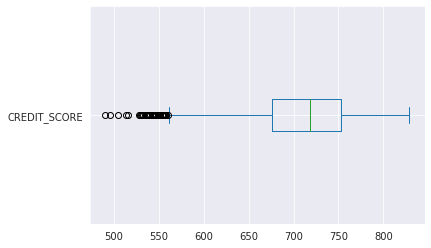

In [15]:
get_plot_and_stat(mortage_dataset.CREDIT_SCORE)

Med:718.0, mean712.5911988611747


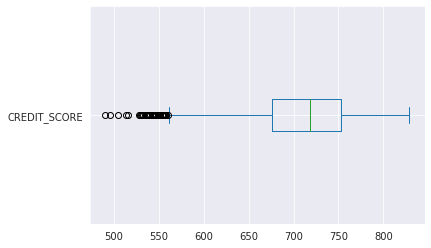

In [16]:
mortage_dataset["Missing_CREDIT_SCORE"] = mortage_dataset.CREDIT_SCORE.isna()
mortage_dataset.CREDIT_SCORE.fillna(mortage_dataset.CREDIT_SCORE.median(),inplace=True)
get_plot_and_stat(mortage_dataset.CREDIT_SCORE)

Med:0.0, mean12.618431639537043


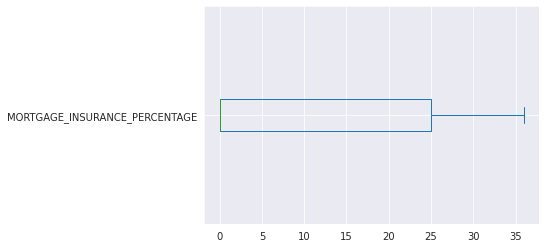

In [17]:
get_plot_and_stat(mortage_dataset.MORTGAGE_INSURANCE_PERCENTAGE)

Med:0.0, mean12.618431639537043


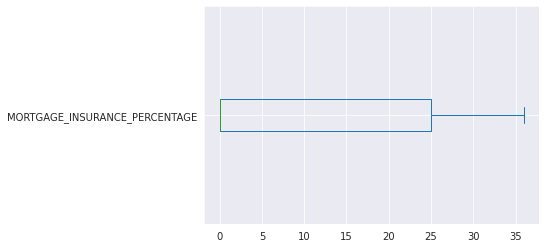

In [18]:
mortage_dataset["Missing_MORTGAGE_INSURANCE_PERCENTAGE"] = mortage_dataset.MORTGAGE_INSURANCE_PERCENTAGE.isna()
mortage_dataset.MORTGAGE_INSURANCE_PERCENTAGE.fillna(mortage_dataset.MORTGAGE_INSURANCE_PERCENTAGE.mean(),inplace=True)
get_plot_and_stat(mortage_dataset.MORTGAGE_INSURANCE_PERCENTAGE)

Med:80.0, mean79.01392585257165


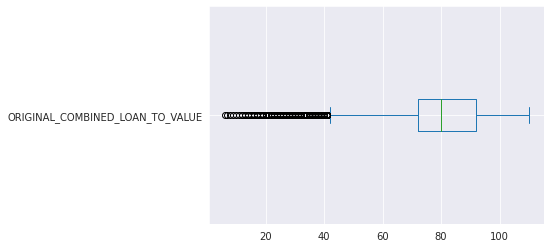

In [19]:
get_plot_and_stat(mortage_dataset.ORIGINAL_COMBINED_LOAN_TO_VALUE)


Med:80.0, mean79.01392585257165


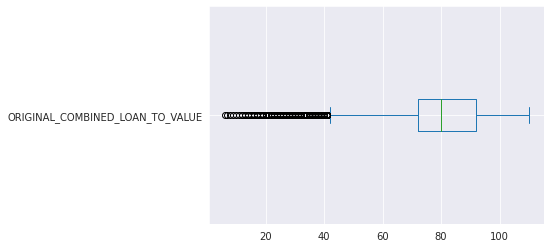

In [20]:
mortage_dataset["Missing_ORIGINAL_COMBINED_LOAN_TO_VALUE"] = mortage_dataset.ORIGINAL_COMBINED_LOAN_TO_VALUE.isna()
mortage_dataset.ORIGINAL_COMBINED_LOAN_TO_VALUE.fillna(mortage_dataset.ORIGINAL_COMBINED_LOAN_TO_VALUE.mean(),inplace=True)
get_plot_and_stat(mortage_dataset.ORIGINAL_COMBINED_LOAN_TO_VALUE)

Med:30.0, mean30.376431268180973


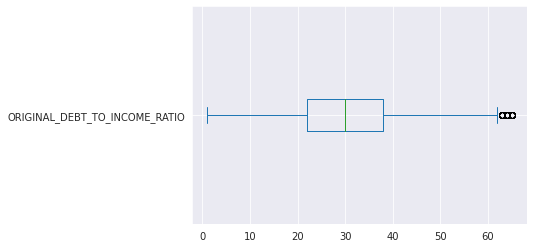

In [21]:
get_plot_and_stat(mortage_dataset.ORIGINAL_DEBT_TO_INCOME_RATIO)

Med:30.0, mean30.376431268180973


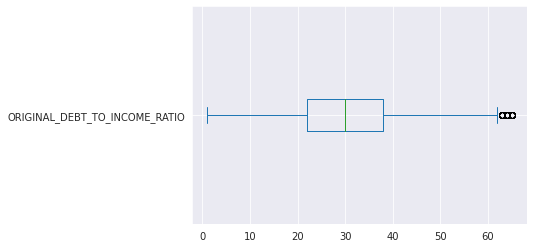

In [22]:
mortage_dataset["Missing_ORIGINAL_DEBT_TO_INCOME_RATIO"] = mortage_dataset.ORIGINAL_DEBT_TO_INCOME_RATIO.isna()
mortage_dataset.ORIGINAL_DEBT_TO_INCOME_RATIO.fillna(mortage_dataset.ORIGINAL_DEBT_TO_INCOME_RATIO.mean(),inplace=True)
get_plot_and_stat(mortage_dataset.ORIGINAL_DEBT_TO_INCOME_RATIO)

Med:80.0, mean78.97951352355017


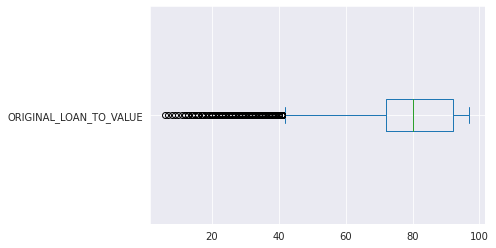

In [23]:
mortage_dataset["Missing_ORIGINAL_LOAN_TO_VALUE"] = mortage_dataset.ORIGINAL_LOAN_TO_VALUE.isna()
mortage_dataset.ORIGINAL_LOAN_TO_VALUE.fillna(mortage_dataset.ORIGINAL_LOAN_TO_VALUE.mean(),inplace=True)
get_plot_and_stat(mortage_dataset.ORIGINAL_LOAN_TO_VALUE)

Med:2.0, mean1.6491304078727487


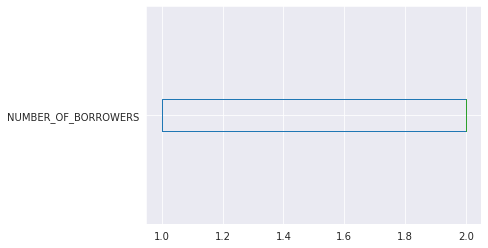

In [24]:
get_plot_and_stat(mortage_dataset.NUMBER_OF_BORROWERS)

Med:2.0, mean1.6491304078727487


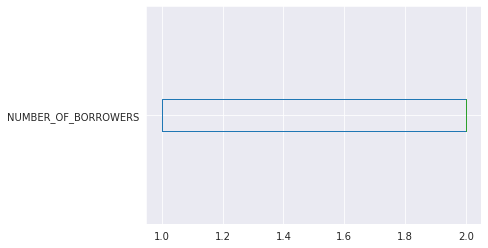

In [25]:
mortage_dataset["Missing_NUMBER_OF_BORROWERS"] = mortage_dataset.NUMBER_OF_BORROWERS.isna()
mortage_dataset.NUMBER_OF_BORROWERS.fillna(mortage_dataset.NUMBER_OF_BORROWERS.mode()[0],inplace=True)
get_plot_and_stat(mortage_dataset.NUMBER_OF_BORROWERS)

Med:1.0, mean1.013306925790679


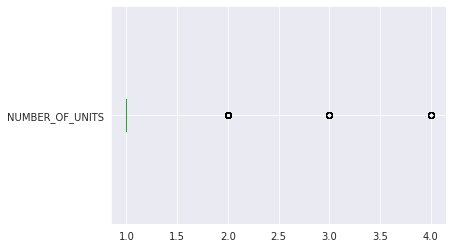

In [26]:
mortage_dataset["Missing_NUMBER_OF_UNITS"] = mortage_dataset.NUMBER_OF_UNITS.isna()
mortage_dataset.NUMBER_OF_UNITS.fillna(mortage_dataset.NUMBER_OF_UNITS.mode()[0],inplace=True)
get_plot_and_stat(mortage_dataset.NUMBER_OF_UNITS)

In [27]:
mortage_dataset["Missing_FIRST_TIME_HOMEBUYER_FLAG"] = mortage_dataset.FIRST_TIME_HOMEBUYER_FLAG.isna()
mortage_dataset.FIRST_TIME_HOMEBUYER_FLAG.fillna(mortage_dataset.FIRST_TIME_HOMEBUYER_FLAG.mode()[0],inplace=True)

Med:31420.0, mean30434.06114996596


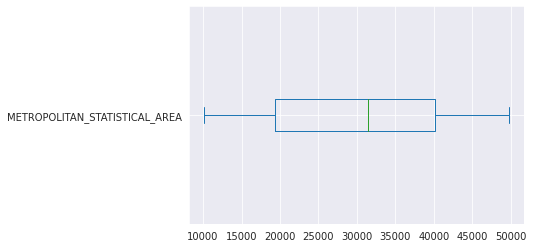

In [28]:
mortage_dataset["Missing_METROPOLITAN_STATISTICAL_AREA"] = mortage_dataset.METROPOLITAN_STATISTICAL_AREA.isna()
mortage_dataset.METROPOLITAN_STATISTICAL_AREA.fillna(mortage_dataset.METROPOLITAN_STATISTICAL_AREA.mode()[0],inplace=True)
get_plot_and_stat(mortage_dataset.METROPOLITAN_STATISTICAL_AREA)

In [29]:
mortage_dataset["Missing_PREPAYMENT_PENALTY_MORTGAGE_FLAG"] = mortage_dataset.PREPAYMENT_PENALTY_MORTGAGE_FLAG.isna()
mortage_dataset.PREPAYMENT_PENALTY_MORTGAGE_FLAG.fillna(mortage_dataset.PREPAYMENT_PENALTY_MORTGAGE_FLAG.mode()[0],inplace=True)

In [30]:
mortage_dataset["Missing_POSTAL_CODE"] = mortage_dataset.POSTAL_CODE.isna()
mortage_dataset.POSTAL_CODE.fillna(mortage_dataset.POSTAL_CODE.mode()[0],inplace=True)

In [31]:
mortage_dataset["Missing_PROPERTY_TYPE"] = mortage_dataset.PROPERTY_TYPE.isna()
mortage_dataset.PROPERTY_TYPE.fillna(mortage_dataset.PROPERTY_TYPE.mode()[0],inplace=True)

In [32]:
mortage_dataset["Missing_PREPAID"] = mortage_dataset.PREPAID.isna()
mortage_dataset.PREPAID.fillna(mortage_dataset.PREPAID.mode()[0],inplace=True)

In [33]:
mortage_dataset["Missing_DELINQUENT"] = mortage_dataset.DELINQUENT.isna()
mortage_dataset.DELINQUENT.fillna(mortage_dataset.DELINQUENT.mode()[0],inplace=True)

In [34]:
mortage_dataset.isna().sum()

CREDIT_SCORE                                0
FIRST_PAYMENT_DATE                          0
FIRST_TIME_HOMEBUYER_FLAG                   0
MATURITY_DATE                               0
METROPOLITAN_STATISTICAL_AREA               0
MORTGAGE_INSURANCE_PERCENTAGE               0
NUMBER_OF_UNITS                             0
OCCUPANCY_STATUS                            0
ORIGINAL_COMBINED_LOAN_TO_VALUE             0
ORIGINAL_DEBT_TO_INCOME_RATIO               0
ORIGINAL_UPB                                0
ORIGINAL_LOAN_TO_VALUE                      0
ORIGINAL_INTEREST_RATE                      0
CHANNEL                                     0
PREPAYMENT_PENALTY_MORTGAGE_FLAG            0
PRODUCT_TYPE                                0
PROPERTY_STATE                              0
PROPERTY_TYPE                               0
POSTAL_CODE                                 0
LOAN_PURPOSE                                0
ORIGINAL_LOAN_TERM                          0
NUMBER_OF_BORROWERS               

In [35]:
mortage_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16157 entries, F199Q1000005 to F199Q1089827
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CREDIT_SCORE                              16157 non-null  float64
 1   FIRST_PAYMENT_DATE                        16157 non-null  int64  
 2   FIRST_TIME_HOMEBUYER_FLAG                 16157 non-null  object 
 3   MATURITY_DATE                             16157 non-null  int64  
 4   METROPOLITAN_STATISTICAL_AREA             16157 non-null  float64
 5   MORTGAGE_INSURANCE_PERCENTAGE             16157 non-null  float64
 6   NUMBER_OF_UNITS                           16157 non-null  int64  
 7   OCCUPANCY_STATUS                          16157 non-null  object 
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE           16157 non-null  int64  
 9   ORIGINAL_DEBT_TO_INCOME_RATIO             16157 non-null  float64
 10  ORIGINAL_UPB         

In [36]:
new_numeric_mortage_dataset = (mortage_dataset.select_dtypes(["number","bool"])).apply(pd.to_numeric)
new_numeric_mortage_dataset.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,PREPAID,DELINQUENT,Missing_CREDIT_SCORE,Missing_MORTGAGE_INSURANCE_PERCENTAGE,Missing_ORIGINAL_COMBINED_LOAN_TO_VALUE,Missing_ORIGINAL_DEBT_TO_INCOME_RATIO,Missing_ORIGINAL_LOAN_TO_VALUE,Missing_NUMBER_OF_BORROWERS,Missing_NUMBER_OF_UNITS,Missing_FIRST_TIME_HOMEBUYER_FLAG,Missing_METROPOLITAN_STATISTICAL_AREA,Missing_PREPAYMENT_PENALTY_MORTGAGE_FLAG,Missing_POSTAL_CODE,Missing_PROPERTY_TYPE,Missing_PREPAID,Missing_DELINQUENT
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,199904,202903,17140.0,0.0,1,25,10.0,53000,25,6.500,45200.0,360.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
F199Q1000007,679.0,200208,202902,15940.0,30.0,1,91,48.0,133000,91,6.750,44700.0,319.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
F199Q1000013,721.0,200209,202902,38060.0,0.0,1,39,13.0,174000,39,6.625,85200.0,318.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
F199Q1000015,618.0,200210,202902,10420.0,25.0,1,85,24.0,122000,85,6.375,44200.0,317.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
F199Q1000016,738.0,200211,202903,10420.0,0.0,1,73,44.0,218000,73,6.000,44300.0,317.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
new_category_mortage_dataset = mortage_dataset.select_dtypes(["category","object"])
new_category_mortage_dataset.head()

,FIRST_TIME_HOMEBUYER_FLAG,OCCUPANCY_STATUS,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,LOAN_PURPOSE,SELLER_NAME,SERVICER_NAME
LOAN_SEQUENCE_NUMBER,,,,,,,,,,
F199Q1000005,N,O,R,N,FRM,OH,SF,N,Other sellers,Other servicers
F199Q1000007,N,O,R,N,FRM,OH,SF,P,Other sellers,Other servicers
F199Q1000013,N,O,T,N,FRM,AZ,SF,N,Other sellers,Other servicers
F199Q1000015,N,O,R,N,FRM,OH,SF,N,Other sellers,Other servicers
F199Q1000016,N,O,R,N,FRM,OH,SF,P,Other sellers,Other servicers


In [38]:
from sklearn.preprocessing import *

In [39]:
end = OneHotEncoder()

In [40]:
end.fit(new_category_mortage_dataset.to_numpy())

OneHotEncoder()

In [41]:
#issue

In [42]:
dummy_vars = end.fit_transform(new_category_mortage_dataset).toarray()

In [43]:
dummy_mortage_dataset = pd.DataFrame(dummy_vars, index=new_numeric_mortage_dataset.index,columns=end.get_feature_names_out())
dummy_mortage_dataset.head()

,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_Y,OCCUPANCY_STATUS_I,OCCUPANCY_STATUS_O,OCCUPANCY_STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,PREPAYMENT_PENALTY_MORTGAGE_FLAG_N,PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y,PRODUCT_TYPE_FRM,PROPERTY_STATE_AK,PROPERTY_STATE_AL,PROPERTY_STATE_AR,PROPERTY_STATE_AZ,PROPERTY_STATE_CA,PROPERTY_STATE_CO,PROPERTY_STATE_CT,PROPERTY_STATE_DC,PROPERTY_STATE_DE,PROPERTY_STATE_FL,PROPERTY_STATE_GA,PROPERTY_STATE_HI,PROPERTY_STATE_IA,PROPERTY_STATE_ID,PROPERTY_STATE_IL,PROPERTY_STATE_IN,PROPERTY_STATE_KS,PROPERTY_STATE_KY,PROPERTY_STATE_LA,PROPERTY_STATE_MA,PROPERTY_STATE_MD,PROPERTY_STATE_ME,PROPERTY_STATE_MI,PROPERTY_STATE_MN,PROPERTY_STATE_MO,PROPERTY_STATE_MS,PROPERTY_STATE_MT,PROPERTY_STATE_NC,PROPERTY_STATE_ND,PROPERTY_STATE_NE,PROPERTY_STATE_NH,PROPERTY_STATE_NJ,PROPERTY_STATE_NM,PROPERTY_STATE_NV,PROPERTY_STATE_NY,PROPERTY_STATE_OH,PROPERTY_STATE_OK,PROPERTY_STATE_OR,PROPERTY_STATE_PA,PROPERTY_STATE_PR,PROPERTY_STATE_RI,PROPERTY_STATE_SC,PROPERTY_STATE_SD,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY,PROPERTY_TYPE_CO,PROPERTY_TYPE_CP,PROPERTY_TYPE_LH,PROPERTY_TYPE_MH,PROPERTY_TYPE_PU,PROPERTY_TYPE_SF,LOAN_PURPOSE_C,LOAN_PURPOSE_N,LOAN_PURPOSE_P,SELLER_NAME_ACCUBANC MORTGAGE CO,SELLER_NAME_BANKAMERICA MORTGAGE,SELLER_NAME_BISHOP'S GATE RESIDE,SELLER_NAME_CHASE MANHATTAN MORT,SELLER_NAME_COUNTRYWIDE HOME LOA,SELLER_NAME_CROSSLAND MORTGAGE C,SELLER_NAME_FIRST UNION CAPITAL,"SELLER_NAME_FLAGSTAR BANK, FSB",SELLER_NAME_FLEET MORTGAGE CORPO,SELLER_NAME_FT MORTGAGE COMPANIE,SELLER_NAME_G N MORTGAGE CORPORA,SELLER_NAME_GMAC MORTGAGE CORPOR,SELLER_NAME_NAMCO ASSET MANAGEME,SELLER_NAME_NATIONAL CITY MORTGA,SELLER_NAME_NATIONSBANC MORTGAGE,"SELLER_NAME_NATIONSBANK, N.A.","SELLER_NAME_NORWEST MORTGAGE, IN",SELLER_NAME_OLD KENT MORTGAGE CO,SELLER_NAME_Other sellers,SELLER_NAME_PNC MORTGAGE CORPORA,SELLER_NAME_RESOURCE BANCSHARES,SELLER_NAME_STANDARD FEDERAL BAN,SELLER_NAME_WASHINGTON MUTUAL BA,"SERVICER_NAME_ABNAMROMTGEGROUP,INC","SERVICER_NAME_BAMORTGAGE,LLC","SERVICER_NAME_BANKOFAMERICA,NA",SERVICER_NAME_CHASEHOMEFINANCELLC,SERVICER_NAME_CHASEMANHATTANMTGECO,SERVICER_NAME_CHASEMTGECO,"SERVICER_NAME_CITIMORTGAGE,INC",SERVICER_NAME_COUNTRYWIDE,SERVICER_NAME_FIFTHTHIRDBANK,"SERVICER_NAME_FTMTGESERVICES,INC",SERVICER_NAME_GMACMTGECORP,"SERVICER_NAME_HOMESIDELENDING,INC","SERVICER_NAME_JPMORGANCHASEBANK,NA",SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000013,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [44]:
joined_mortage_dataset = new_numeric_mortage_dataset.join(dummy_mortage_dataset)
joined_mortage_dataset.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,PREPAID,DELINQUENT,Missing_CREDIT_SCORE,Missing_MORTGAGE_INSURANCE_PERCENTAGE,Missing_ORIGINAL_COMBINED_LOAN_TO_VALUE,Missing_ORIGINAL_DEBT_TO_INCOME_RATIO,Missing_ORIGINAL_LOAN_TO_VALUE,Missing_NUMBER_OF_BORROWERS,Missing_NUMBER_OF_UNITS,Missing_FIRST_TIME_HOMEBUYER_FLAG,Missing_METROPOLITAN_STATISTICAL_AREA,Missing_PREPAYMENT_PENALTY_MORTGAGE_FLAG,Missing_POSTAL_CODE,Missing_PROPERTY_TYPE,Missing_PREPAID,Missing_DELINQUENT,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_Y,OCCUPANCY_STATUS_I,OCCUPANCY_STATUS_O,OCCUPANCY_STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,PREPAYMENT_PENALTY_MORTGAGE_FLAG_N,PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y,PRODUCT_TYPE_FRM,PROPERTY_STATE_AK,PROPERTY_STATE_AL,PROPERTY_STATE_AR,PROPERTY_STATE_AZ,PROPERTY_STATE_CA,PROPERTY_STATE_CO,PROPERTY_STATE_CT,PROPERTY_STATE_DC,PROPERTY_STATE_DE,PROPERTY_STATE_FL,PROPERTY_STATE_GA,PROPERTY_STATE_HI,PROPERTY_STATE_IA,PROPERTY_STATE_ID,PROPERTY_STATE_IL,PROPERTY_STATE_IN,PROPERTY_STATE_KS,PROPERTY_STATE_KY,PROPERTY_STATE_LA,PROPERTY_STATE_MA,PROPERTY_STATE_MD,PROPERTY_STATE_ME,PROPERTY_STATE_MI,PROPERTY_STATE_MN,PROPERTY_STATE_MO,PROPERTY_STATE_MS,PROPERTY_STATE_MT,PROPERTY_STATE_NC,PROPERTY_STATE_ND,PROPERTY_STATE_NE,PROPERTY_STATE_NH,PROPERTY_STATE_NJ,PROPERTY_STATE_NM,PROPERTY_STATE_NV,PROPERTY_STATE_NY,PROPERTY_STATE_OH,PROPERTY_STATE_OK,PROPERTY_STATE_OR,PROPERTY_STATE_PA,PROPERTY_STATE_PR,PROPERTY_STATE_RI,PROPERTY_STATE_SC,PROPERTY_STATE_SD,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY,PROPERTY_TYPE_CO,PROPERTY_TYPE_CP,PROPERTY_TYPE_LH,PROPERTY_TYPE_MH,PROPERTY_TYPE_PU,PROPERTY_TYPE_SF,LOAN_PURPOSE_C,LOAN_PURPOSE_N,LOAN_PURPOSE_P,SELLER_NAME_ACCUBANC MORTGAGE CO,SELLER_NAME_BANKAMERICA MORTGAGE,SELLER_NAME_BISHOP'S GATE RESIDE,SELLER_NAME_CHASE MANHATTAN MORT,SELLER_NAME_COUNTRYWIDE HOME LOA,SELLER_NAME_CROSSLAND MORTGAGE C,SELLER_NAME_FIRST UNION CAPITAL,"SELLER_NAME_FLAGSTAR BANK, FSB",SELLER_NAME_FLEET MORTGAGE CORPO,SELLER_NAME_FT MORTGAGE COMPANIE,SELLER_NAME_G N MORTGAGE CORPORA,SELLER_NAME_GMAC MORTGAGE CORPOR,SELLER_NAME_NAMCO ASSET MANAGEME,SELLER_NAME_NATIONAL CITY MORTGA,SELLER_NAME_NATIONSBANC MORTGAGE,"SELLER_NAME_NATIONSBANK, N.A.","SELLER_NAME_NORWEST MORTGAGE, IN",SELLER_NAME_OLD KENT MORTGAGE CO,SELLER_NAME_Other sellers,SELLER_NAME_PNC MORTGAGE CORPORA,SELLER_NAME_RESOURCE BANCSHARES,SELLER_NAME_STANDARD FEDERAL BAN,SELLER_NAME_WASHINGTON MUTUAL BA,"SERVICER_NAME_ABNAMROMTGEGROUP,INC","SERVICER_NAME_BAMORTGAGE,LLC","SERVICER_NAME_BANKOFAMERICA,NA",SERVICER_NAME_CHASEHOMEFINANCELLC,SERVICER_NAME_CHASEMANHATTANMTGECO,SERVICER_NAME_CHASEMTGECO,"SERVICER_NAME_CITIMORTGAGE,INC",SERVICER_NAME_COUNTRYWIDE,SERVICER_NAME_FIFTHTHIRDBANK,"SERVICER_NAME_FTMTGESERVICES,INC",SERVICER_NAME_GMACMTGECORP,"SERVICER_NAME_HOMESIDELENDING,INC","SERVICER_NAME_JPMORGANCHASEBANK,NA",SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,199904,202903,17140.0,0.0,1,25,10.0,53000,25,6.500,45200.0,360.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [45]:
y=  joined_mortage_dataset.PREPAID
x = joined_mortage_dataset.drop(["DELINQUENT","PREPAID"],axis=1)
x.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,Missing_CREDIT_SCORE,Missing_MORTGAGE_INSURANCE_PERCENTAGE,Missing_ORIGINAL_COMBINED_LOAN_TO_VALUE,Missing_ORIGINAL_DEBT_TO_INCOME_RATIO,Missing_ORIGINAL_LOAN_TO_VALUE,Missing_NUMBER_OF_BORROWERS,Missing_NUMBER_OF_UNITS,Missing_FIRST_TIME_HOMEBUYER_FLAG,Missing_METROPOLITAN_STATISTICAL_AREA,Missing_PREPAYMENT_PENALTY_MORTGAGE_FLAG,Missing_POSTAL_CODE,Missing_PROPERTY_TYPE,Missing_PREPAID,Missing_DELINQUENT,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_Y,OCCUPANCY_STATUS_I,OCCUPANCY_STATUS_O,OCCUPANCY_STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,PREPAYMENT_PENALTY_MORTGAGE_FLAG_N,PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y,PRODUCT_TYPE_FRM,PROPERTY_STATE_AK,PROPERTY_STATE_AL,PROPERTY_STATE_AR,PROPERTY_STATE_AZ,PROPERTY_STATE_CA,PROPERTY_STATE_CO,PROPERTY_STATE_CT,PROPERTY_STATE_DC,PROPERTY_STATE_DE,PROPERTY_STATE_FL,PROPERTY_STATE_GA,PROPERTY_STATE_HI,PROPERTY_STATE_IA,PROPERTY_STATE_ID,PROPERTY_STATE_IL,PROPERTY_STATE_IN,PROPERTY_STATE_KS,PROPERTY_STATE_KY,PROPERTY_STATE_LA,PROPERTY_STATE_MA,PROPERTY_STATE_MD,PROPERTY_STATE_ME,PROPERTY_STATE_MI,PROPERTY_STATE_MN,PROPERTY_STATE_MO,PROPERTY_STATE_MS,PROPERTY_STATE_MT,PROPERTY_STATE_NC,PROPERTY_STATE_ND,PROPERTY_STATE_NE,PROPERTY_STATE_NH,PROPERTY_STATE_NJ,PROPERTY_STATE_NM,PROPERTY_STATE_NV,PROPERTY_STATE_NY,PROPERTY_STATE_OH,PROPERTY_STATE_OK,PROPERTY_STATE_OR,PROPERTY_STATE_PA,PROPERTY_STATE_PR,PROPERTY_STATE_RI,PROPERTY_STATE_SC,PROPERTY_STATE_SD,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY,PROPERTY_TYPE_CO,PROPERTY_TYPE_CP,PROPERTY_TYPE_LH,PROPERTY_TYPE_MH,PROPERTY_TYPE_PU,PROPERTY_TYPE_SF,LOAN_PURPOSE_C,LOAN_PURPOSE_N,LOAN_PURPOSE_P,SELLER_NAME_ACCUBANC MORTGAGE CO,SELLER_NAME_BANKAMERICA MORTGAGE,SELLER_NAME_BISHOP'S GATE RESIDE,SELLER_NAME_CHASE MANHATTAN MORT,SELLER_NAME_COUNTRYWIDE HOME LOA,SELLER_NAME_CROSSLAND MORTGAGE C,SELLER_NAME_FIRST UNION CAPITAL,"SELLER_NAME_FLAGSTAR BANK, FSB",SELLER_NAME_FLEET MORTGAGE CORPO,SELLER_NAME_FT MORTGAGE COMPANIE,SELLER_NAME_G N MORTGAGE CORPORA,SELLER_NAME_GMAC MORTGAGE CORPOR,SELLER_NAME_NAMCO ASSET MANAGEME,SELLER_NAME_NATIONAL CITY MORTGA,SELLER_NAME_NATIONSBANC MORTGAGE,"SELLER_NAME_NATIONSBANK, N.A.","SELLER_NAME_NORWEST MORTGAGE, IN",SELLER_NAME_OLD KENT MORTGAGE CO,SELLER_NAME_Other sellers,SELLER_NAME_PNC MORTGAGE CORPORA,SELLER_NAME_RESOURCE BANCSHARES,SELLER_NAME_STANDARD FEDERAL BAN,SELLER_NAME_WASHINGTON MUTUAL BA,"SERVICER_NAME_ABNAMROMTGEGROUP,INC","SERVICER_NAME_BAMORTGAGE,LLC","SERVICER_NAME_BANKOFAMERICA,NA",SERVICER_NAME_CHASEHOMEFINANCELLC,SERVICER_NAME_CHASEMANHATTANMTGECO,SERVICER_NAME_CHASEMTGECO,"SERVICER_NAME_CITIMORTGAGE,INC",SERVICER_NAME_COUNTRYWIDE,SERVICER_NAME_FIFTHTHIRDBANK,"SERVICER_NAME_FTMTGESERVICES,INC",SERVICER_NAME_GMACMTGECORP,"SERVICER_NAME_HOMESIDELENDING,INC","SERVICER_NAME_JPMORGANCHASEBANK,NA",SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,199904,202903,17140.0,0.0,1,25,10.0,53000,25,6.500,45200.0,360.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [46]:
x

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,Missing_CREDIT_SCORE,Missing_MORTGAGE_INSURANCE_PERCENTAGE,Missing_ORIGINAL_COMBINED_LOAN_TO_VALUE,Missing_ORIGINAL_DEBT_TO_INCOME_RATIO,Missing_ORIGINAL_LOAN_TO_VALUE,Missing_NUMBER_OF_BORROWERS,Missing_NUMBER_OF_UNITS,Missing_FIRST_TIME_HOMEBUYER_FLAG,Missing_METROPOLITAN_STATISTICAL_AREA,Missing_PREPAYMENT_PENALTY_MORTGAGE_FLAG,Missing_POSTAL_CODE,Missing_PROPERTY_TYPE,Missing_PREPAID,Missing_DELINQUENT,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_Y,OCCUPANCY_STATUS_I,OCCUPANCY_STATUS_O,OCCUPANCY_STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,PREPAYMENT_PENALTY_MORTGAGE_FLAG_N,PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y,PRODUCT_TYPE_FRM,PROPERTY_STATE_AK,PROPERTY_STATE_AL,PROPERTY_STATE_AR,PROPERTY_STATE_AZ,PROPERTY_STATE_CA,PROPERTY_STATE_CO,PROPERTY_STATE_CT,PROPERTY_STATE_DC,PROPERTY_STATE_DE,PROPERTY_STATE_FL,PROPERTY_STATE_GA,PROPERTY_STATE_HI,PROPERTY_STATE_IA,PROPERTY_STATE_ID,PROPERTY_STATE_IL,PROPERTY_STATE_IN,PROPERTY_STATE_KS,PROPERTY_STATE_KY,PROPERTY_STATE_LA,PROPERTY_STATE_MA,PROPERTY_STATE_MD,PROPERTY_STATE_ME,PROPERTY_STATE_MI,PROPERTY_STATE_MN,PROPERTY_STATE_MO,PROPERTY_STATE_MS,PROPERTY_STATE_MT,PROPERTY_STATE_NC,PROPERTY_STATE_ND,PROPERTY_STATE_NE,PROPERTY_STATE_NH,PROPERTY_STATE_NJ,PROPERTY_STATE_NM,PROPERTY_STATE_NV,PROPERTY_STATE_NY,PROPERTY_STATE_OH,PROPERTY_STATE_OK,PROPERTY_STATE_OR,PROPERTY_STATE_PA,PROPERTY_STATE_PR,PROPERTY_STATE_RI,PROPERTY_STATE_SC,PROPERTY_STATE_SD,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY,PROPERTY_TYPE_CO,PROPERTY_TYPE_CP,PROPERTY_TYPE_LH,PROPERTY_TYPE_MH,PROPERTY_TYPE_PU,PROPERTY_TYPE_SF,LOAN_PURPOSE_C,LOAN_PURPOSE_N,LOAN_PURPOSE_P,SELLER_NAME_ACCUBANC MORTGAGE CO,SELLER_NAME_BANKAMERICA MORTGAGE,SELLER_NAME_BISHOP'S GATE RESIDE,SELLER_NAME_CHASE MANHATTAN MORT,SELLER_NAME_COUNTRYWIDE HOME LOA,SELLER_NAME_CROSSLAND MORTGAGE C,SELLER_NAME_FIRST UNION CAPITAL,"SELLER_NAME_FLAGSTAR BANK, FSB",SELLER_NAME_FLEET MORTGAGE CORPO,SELLER_NAME_FT MORTGAGE COMPANIE,SELLER_NAME_G N MORTGAGE CORPORA,SELLER_NAME_GMAC MORTGAGE CORPOR,SELLER_NAME_NAMCO ASSET MANAGEME,SELLER_NAME_NATIONAL CITY MORTGA,SELLER_NAME_NATIONSBANC MORTGAGE,"SELLER_NAME_NATIONSBANK, N.A.","SELLER_NAME_NORWEST MORTGAGE, IN",SELLER_NAME_OLD KENT MORTGAGE CO,SELLER_NAME_Other sellers,SELLER_NAME_PNC MORTGAGE CORPORA,SELLER_NAME_RESOURCE BANCSHARES,SELLER_NAME_STANDARD FEDERAL BAN,SELLER_NAME_WASHINGTON MUTUAL BA,"SERVICER_NAME_ABNAMROMTGEGROUP,INC","SERVICER_NAME_BAMORTGAGE,LLC","SERVICER_NAME_BANKOFAMERICA,NA",SERVICER_NAME_CHASEHOMEFINANCELLC,SERVICER_NAME_CHASEMANHATTANMTGECO,SERVICER_NAME_CHASEMTGECO,"SERVICER_NAME_CITIMORTGAGE,INC",SERVICER_NAME_COUNTRYWIDE,SERVICER_NAME_FIFTHTHIRDBANK,"SERVICER_NAME_FTMTGESERVICES,INC",SERVICER_NAME_GMACMTGECORP,"SERVICER_NAME_HOMESIDELENDING,INC","SERVICER_NAME_JPMORGANCHASEBANK,NA",SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,199904,202903,17140.0,0.0,1,25,10.0,53000,25,6.500,45200.0,360.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(oob_score=True,min_samples_leaf=int(175 **.5))

In [48]:
clf.fit(x,y)

RandomForestClassifier(min_samples_leaf=13, oob_score=True)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)

In [50]:
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [51]:
print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(9694, 144)
(9694,)
(3231, 144)
(3231,)
(3232, 144)
(3232,)


(None, None)

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
model.score(x_test, y_test)

0.9520420792079208

In [54]:
y_predicted = model.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[   9,  147],
       [   8, 3068]])

Text(69.0, 0.5, 'Truth')

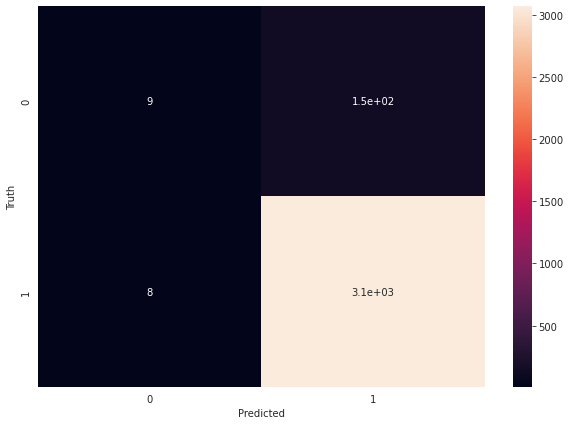

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Logistic regression

In [57]:
y=  joined_mortage_dataset.PREPAID
x = joined_mortage_dataset.drop(["DELINQUENT","PREPAID"],axis=1)
x.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,Missing_CREDIT_SCORE,Missing_MORTGAGE_INSURANCE_PERCENTAGE,Missing_ORIGINAL_COMBINED_LOAN_TO_VALUE,Missing_ORIGINAL_DEBT_TO_INCOME_RATIO,Missing_ORIGINAL_LOAN_TO_VALUE,Missing_NUMBER_OF_BORROWERS,Missing_NUMBER_OF_UNITS,Missing_FIRST_TIME_HOMEBUYER_FLAG,Missing_METROPOLITAN_STATISTICAL_AREA,Missing_PREPAYMENT_PENALTY_MORTGAGE_FLAG,Missing_POSTAL_CODE,Missing_PROPERTY_TYPE,Missing_PREPAID,Missing_DELINQUENT,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_Y,OCCUPANCY_STATUS_I,OCCUPANCY_STATUS_O,OCCUPANCY_STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,PREPAYMENT_PENALTY_MORTGAGE_FLAG_N,PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y,PRODUCT_TYPE_FRM,PROPERTY_STATE_AK,PROPERTY_STATE_AL,PROPERTY_STATE_AR,PROPERTY_STATE_AZ,PROPERTY_STATE_CA,PROPERTY_STATE_CO,PROPERTY_STATE_CT,PROPERTY_STATE_DC,PROPERTY_STATE_DE,PROPERTY_STATE_FL,PROPERTY_STATE_GA,PROPERTY_STATE_HI,PROPERTY_STATE_IA,PROPERTY_STATE_ID,PROPERTY_STATE_IL,PROPERTY_STATE_IN,PROPERTY_STATE_KS,PROPERTY_STATE_KY,PROPERTY_STATE_LA,PROPERTY_STATE_MA,PROPERTY_STATE_MD,PROPERTY_STATE_ME,PROPERTY_STATE_MI,PROPERTY_STATE_MN,PROPERTY_STATE_MO,PROPERTY_STATE_MS,PROPERTY_STATE_MT,PROPERTY_STATE_NC,PROPERTY_STATE_ND,PROPERTY_STATE_NE,PROPERTY_STATE_NH,PROPERTY_STATE_NJ,PROPERTY_STATE_NM,PROPERTY_STATE_NV,PROPERTY_STATE_NY,PROPERTY_STATE_OH,PROPERTY_STATE_OK,PROPERTY_STATE_OR,PROPERTY_STATE_PA,PROPERTY_STATE_PR,PROPERTY_STATE_RI,PROPERTY_STATE_SC,PROPERTY_STATE_SD,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY,PROPERTY_TYPE_CO,PROPERTY_TYPE_CP,PROPERTY_TYPE_LH,PROPERTY_TYPE_MH,PROPERTY_TYPE_PU,PROPERTY_TYPE_SF,LOAN_PURPOSE_C,LOAN_PURPOSE_N,LOAN_PURPOSE_P,SELLER_NAME_ACCUBANC MORTGAGE CO,SELLER_NAME_BANKAMERICA MORTGAGE,SELLER_NAME_BISHOP'S GATE RESIDE,SELLER_NAME_CHASE MANHATTAN MORT,SELLER_NAME_COUNTRYWIDE HOME LOA,SELLER_NAME_CROSSLAND MORTGAGE C,SELLER_NAME_FIRST UNION CAPITAL,"SELLER_NAME_FLAGSTAR BANK, FSB",SELLER_NAME_FLEET MORTGAGE CORPO,SELLER_NAME_FT MORTGAGE COMPANIE,SELLER_NAME_G N MORTGAGE CORPORA,SELLER_NAME_GMAC MORTGAGE CORPOR,SELLER_NAME_NAMCO ASSET MANAGEME,SELLER_NAME_NATIONAL CITY MORTGA,SELLER_NAME_NATIONSBANC MORTGAGE,"SELLER_NAME_NATIONSBANK, N.A.","SELLER_NAME_NORWEST MORTGAGE, IN",SELLER_NAME_OLD KENT MORTGAGE CO,SELLER_NAME_Other sellers,SELLER_NAME_PNC MORTGAGE CORPORA,SELLER_NAME_RESOURCE BANCSHARES,SELLER_NAME_STANDARD FEDERAL BAN,SELLER_NAME_WASHINGTON MUTUAL BA,"SERVICER_NAME_ABNAMROMTGEGROUP,INC","SERVICER_NAME_BAMORTGAGE,LLC","SERVICER_NAME_BANKOFAMERICA,NA",SERVICER_NAME_CHASEHOMEFINANCELLC,SERVICER_NAME_CHASEMANHATTANMTGECO,SERVICER_NAME_CHASEMTGECO,"SERVICER_NAME_CITIMORTGAGE,INC",SERVICER_NAME_COUNTRYWIDE,SERVICER_NAME_FIFTHTHIRDBANK,"SERVICER_NAME_FTMTGESERVICES,INC",SERVICER_NAME_GMACMTGECORP,"SERVICER_NAME_HOMESIDELENDING,INC","SERVICER_NAME_JPMORGANCHASEBANK,NA",SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,199904,202903,17140.0,0.0,1,25,10.0,53000,25,6.500,45200.0,360.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6 , random_state = 1)

In [59]:
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [61]:
model.fit(x_train, y_train)

LogisticRegression()

In [62]:
model.score(x_test, y_test)

0.9486386138613861

In [63]:
y_predicted = model.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[   0,  166],
       [   0, 3066]])

Text(69.0, 0.5, 'Truth')

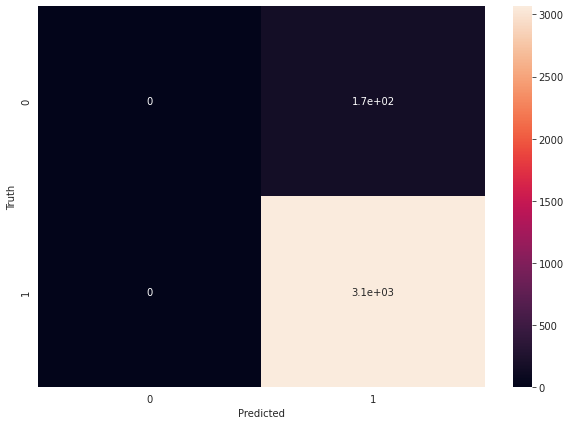

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

L1 regularization

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6 , random_state = 2)

In [68]:
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [69]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
x_train_std = sc.fit_transform(x_train)

# Apply the scaler to the test data
x_test_std = sc.transform(x_test)

In [70]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(x_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(x_train_std, y_train))
    print('Test accuracy:', clf.score(x_test_std, y_test))
    print('')

C: 10
Coefficient of each feature: [[ 8.49293625e-03 -2.27613528e-06 -1.60034426e-06 -4.48816257e-06
   9.04745282e-03 -4.28502751e-01 -3.62236800e-03 -1.75962389e-02
   1.28304563e-05 -1.33191177e-03 -1.00999712e-01  2.84371040e-07
  -1.35419414e-03  2.60713436e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.89104721e-01  0.00000000e+00  0.00000000e+00 -2.80842536e-01
   0.00000000e+00  1.34761597e+00  0.00000000e+00 -1.02480722e-01
  -2.53251379e-01  0.00000000e+00 -2.91832069e-01  7.60120925e-03
   2.06777920e-02 -1.13329948e+00  0.00000000e+00  3.00513526e-01
   2.63237680e-01  1.02420486e+00  0.00000000e+00  3.83836613e-01
   3.93485904e-01 -9.45346028e-03 -4.60420475e-01 -4.33458751e-01
  -7.94777780e-01 -1.21443557e+00 -7.09628722e-02 -2.66024384e-01
  -1.53092320e-01  5.72189275e-01 -1.7707

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


C: 1
Coefficient of each feature: [[ 8.72331723e-03 -4.24233015e-06 -3.90018014e-06 -1.75307576e-06
   9.39448797e-03 -3.85677219e-01 -6.43691737e-04 -1.59234648e-02
   1.28673766e-05 -5.02990437e-03 -4.07628570e-02 -1.62543071e-07
  -2.16160933e-03  2.65326177e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.81976405e-01  0.00000000e+00  0.00000000e+00 -1.85142118e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.35837241e-01  0.00000000e+00 -1.43458733e-01  0.00000000e+00
   0.00000000e+00 -9.50296689e-01  0.00000000e+00  3.00769943e-01
   2.78992287e-01  9.43227022e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.12723662e-02 -2.91182300e-01  0.00000000e+00
  -2.93552509e-01 -9.09940675e-01  5.46306272e-03 -1.46601845e-01
   0.00000000e+00  4.27845660e-01  0.00000

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


C: 0.1
Coefficient of each feature: [[ 8.40354723e-03 -6.46905917e-06 -6.45672858e-06  4.93601339e-06
   1.55239447e-02  0.00000000e+00 -2.76965631e-03 -1.28347897e-02
   1.39627791e-05 -3.86664270e-03  0.00000000e+00  4.18300504e-06
  -3.31091724e-03  1.25536714e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.18229313e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.000

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


C: 0.001
Coefficient of each feature: [[ 6.72667844e-03 -1.19688976e-05 -8.36240027e-06  7.15672643e-06
   2.78462517e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.71649075e-05  0.00000000e+00  0.00000000e+00  3.52161450e-06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


SVM (kernel='rbf')

In [71]:
y=  joined_mortage_dataset.PREPAID
x = joined_mortage_dataset.drop(["DELINQUENT","PREPAID"],axis=1)
x.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,Missing_CREDIT_SCORE,Missing_MORTGAGE_INSURANCE_PERCENTAGE,Missing_ORIGINAL_COMBINED_LOAN_TO_VALUE,Missing_ORIGINAL_DEBT_TO_INCOME_RATIO,Missing_ORIGINAL_LOAN_TO_VALUE,Missing_NUMBER_OF_BORROWERS,Missing_NUMBER_OF_UNITS,Missing_FIRST_TIME_HOMEBUYER_FLAG,Missing_METROPOLITAN_STATISTICAL_AREA,Missing_PREPAYMENT_PENALTY_MORTGAGE_FLAG,Missing_POSTAL_CODE,Missing_PROPERTY_TYPE,Missing_PREPAID,Missing_DELINQUENT,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_Y,OCCUPANCY_STATUS_I,OCCUPANCY_STATUS_O,OCCUPANCY_STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,PREPAYMENT_PENALTY_MORTGAGE_FLAG_N,PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y,PRODUCT_TYPE_FRM,PROPERTY_STATE_AK,PROPERTY_STATE_AL,PROPERTY_STATE_AR,PROPERTY_STATE_AZ,PROPERTY_STATE_CA,PROPERTY_STATE_CO,PROPERTY_STATE_CT,PROPERTY_STATE_DC,PROPERTY_STATE_DE,PROPERTY_STATE_FL,PROPERTY_STATE_GA,PROPERTY_STATE_HI,PROPERTY_STATE_IA,PROPERTY_STATE_ID,PROPERTY_STATE_IL,PROPERTY_STATE_IN,PROPERTY_STATE_KS,PROPERTY_STATE_KY,PROPERTY_STATE_LA,PROPERTY_STATE_MA,PROPERTY_STATE_MD,PROPERTY_STATE_ME,PROPERTY_STATE_MI,PROPERTY_STATE_MN,PROPERTY_STATE_MO,PROPERTY_STATE_MS,PROPERTY_STATE_MT,PROPERTY_STATE_NC,PROPERTY_STATE_ND,PROPERTY_STATE_NE,PROPERTY_STATE_NH,PROPERTY_STATE_NJ,PROPERTY_STATE_NM,PROPERTY_STATE_NV,PROPERTY_STATE_NY,PROPERTY_STATE_OH,PROPERTY_STATE_OK,PROPERTY_STATE_OR,PROPERTY_STATE_PA,PROPERTY_STATE_PR,PROPERTY_STATE_RI,PROPERTY_STATE_SC,PROPERTY_STATE_SD,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY,PROPERTY_TYPE_CO,PROPERTY_TYPE_CP,PROPERTY_TYPE_LH,PROPERTY_TYPE_MH,PROPERTY_TYPE_PU,PROPERTY_TYPE_SF,LOAN_PURPOSE_C,LOAN_PURPOSE_N,LOAN_PURPOSE_P,SELLER_NAME_ACCUBANC MORTGAGE CO,SELLER_NAME_BANKAMERICA MORTGAGE,SELLER_NAME_BISHOP'S GATE RESIDE,SELLER_NAME_CHASE MANHATTAN MORT,SELLER_NAME_COUNTRYWIDE HOME LOA,SELLER_NAME_CROSSLAND MORTGAGE C,SELLER_NAME_FIRST UNION CAPITAL,"SELLER_NAME_FLAGSTAR BANK, FSB",SELLER_NAME_FLEET MORTGAGE CORPO,SELLER_NAME_FT MORTGAGE COMPANIE,SELLER_NAME_G N MORTGAGE CORPORA,SELLER_NAME_GMAC MORTGAGE CORPOR,SELLER_NAME_NAMCO ASSET MANAGEME,SELLER_NAME_NATIONAL CITY MORTGA,SELLER_NAME_NATIONSBANC MORTGAGE,"SELLER_NAME_NATIONSBANK, N.A.","SELLER_NAME_NORWEST MORTGAGE, IN",SELLER_NAME_OLD KENT MORTGAGE CO,SELLER_NAME_Other sellers,SELLER_NAME_PNC MORTGAGE CORPORA,SELLER_NAME_RESOURCE BANCSHARES,SELLER_NAME_STANDARD FEDERAL BAN,SELLER_NAME_WASHINGTON MUTUAL BA,"SERVICER_NAME_ABNAMROMTGEGROUP,INC","SERVICER_NAME_BAMORTGAGE,LLC","SERVICER_NAME_BANKOFAMERICA,NA",SERVICER_NAME_CHASEHOMEFINANCELLC,SERVICER_NAME_CHASEMANHATTANMTGECO,SERVICER_NAME_CHASEMTGECO,"SERVICER_NAME_CITIMORTGAGE,INC",SERVICER_NAME_COUNTRYWIDE,SERVICER_NAME_FIFTHTHIRDBANK,"SERVICER_NAME_FTMTGESERVICES,INC",SERVICER_NAME_GMACMTGECORP,"SERVICER_NAME_HOMESIDELENDING,INC","SERVICER_NAME_JPMORGANCHASEBANK,NA",SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,199904,202903,17140.0,0.0,1,25,10.0,53000,25,6.500,45200.0,360.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6, random_state=1)

In [125]:
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [126]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

In [127]:
len(x_train)

9694

In [128]:
len(x_valid)

3231

In [129]:

len(x_test)

3232

In [130]:
rbf_model.fit(x_train, y_train)

SVC()

In [131]:
rbf_model.score(x_test,y_test)

0.9467821782178217

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[   0,  172],
       [   0, 3060]])

Text(69.0, 0.5, 'Truth')

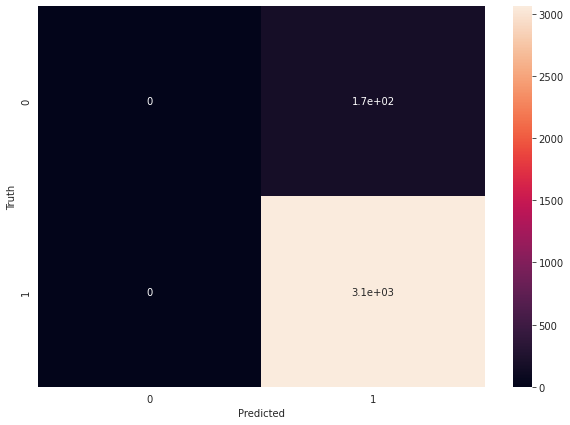

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

SVM (kernel='sigmoid')

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)

In [81]:
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [82]:
from sklearn.svm import SVC
sigmoid_model = SVC(kernel='sigmoid')

In [83]:
len(x_train)

9694

In [84]:
len(x_valid)

3231

In [85]:
sigmoid_model.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [86]:
sigmoid_model.score(x_test,y_test)

0.9452351485148515

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[   0,  153],
       [   0, 3079]])

Text(69.0, 0.5, 'Truth')

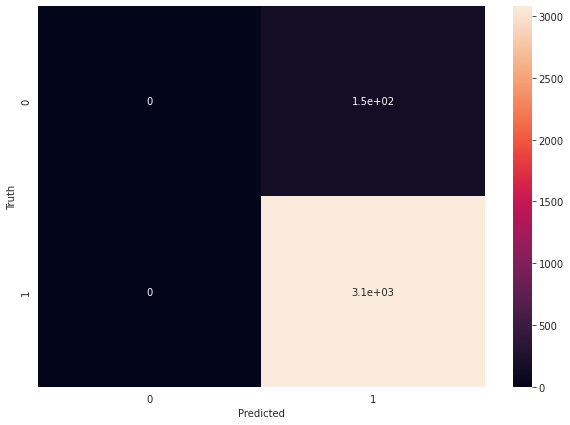

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

SVM (kernel='polynomial')

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)

In [88]:
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [89]:
from sklearn.svm import SVC
polynomial_model = SVC(kernel='poly')

In [90]:
len(x_train)

9694

In [91]:
polynomial_model.fit(x_train, y_train)

SVC(kernel='poly')

In [92]:
polynomial_model.score(x_test,y_test)

0.9452351485148515

Gradient Discriminant Analysis(LDA)

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)

In [95]:
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [96]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [97]:
from sklearn.metrics import accuracy_score
y_pred = lda.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9347153465346535


In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[   0,  153],
       [   0, 3079]])

Text(69.0, 0.5, 'Truth')

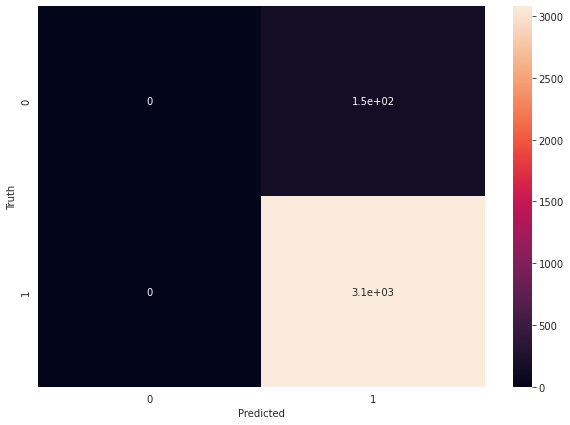

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Artificial neural netwrok

In [100]:
x.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,Missing_CREDIT_SCORE,Missing_MORTGAGE_INSURANCE_PERCENTAGE,Missing_ORIGINAL_COMBINED_LOAN_TO_VALUE,Missing_ORIGINAL_DEBT_TO_INCOME_RATIO,Missing_ORIGINAL_LOAN_TO_VALUE,Missing_NUMBER_OF_BORROWERS,Missing_NUMBER_OF_UNITS,Missing_FIRST_TIME_HOMEBUYER_FLAG,Missing_METROPOLITAN_STATISTICAL_AREA,Missing_PREPAYMENT_PENALTY_MORTGAGE_FLAG,Missing_POSTAL_CODE,Missing_PROPERTY_TYPE,Missing_PREPAID,Missing_DELINQUENT,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_Y,OCCUPANCY_STATUS_I,OCCUPANCY_STATUS_O,OCCUPANCY_STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,PREPAYMENT_PENALTY_MORTGAGE_FLAG_N,PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y,PRODUCT_TYPE_FRM,PROPERTY_STATE_AK,PROPERTY_STATE_AL,PROPERTY_STATE_AR,PROPERTY_STATE_AZ,PROPERTY_STATE_CA,PROPERTY_STATE_CO,PROPERTY_STATE_CT,PROPERTY_STATE_DC,PROPERTY_STATE_DE,PROPERTY_STATE_FL,PROPERTY_STATE_GA,PROPERTY_STATE_HI,PROPERTY_STATE_IA,PROPERTY_STATE_ID,PROPERTY_STATE_IL,PROPERTY_STATE_IN,PROPERTY_STATE_KS,PROPERTY_STATE_KY,PROPERTY_STATE_LA,PROPERTY_STATE_MA,PROPERTY_STATE_MD,PROPERTY_STATE_ME,PROPERTY_STATE_MI,PROPERTY_STATE_MN,PROPERTY_STATE_MO,PROPERTY_STATE_MS,PROPERTY_STATE_MT,PROPERTY_STATE_NC,PROPERTY_STATE_ND,PROPERTY_STATE_NE,PROPERTY_STATE_NH,PROPERTY_STATE_NJ,PROPERTY_STATE_NM,PROPERTY_STATE_NV,PROPERTY_STATE_NY,PROPERTY_STATE_OH,PROPERTY_STATE_OK,PROPERTY_STATE_OR,PROPERTY_STATE_PA,PROPERTY_STATE_PR,PROPERTY_STATE_RI,PROPERTY_STATE_SC,PROPERTY_STATE_SD,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY,PROPERTY_TYPE_CO,PROPERTY_TYPE_CP,PROPERTY_TYPE_LH,PROPERTY_TYPE_MH,PROPERTY_TYPE_PU,PROPERTY_TYPE_SF,LOAN_PURPOSE_C,LOAN_PURPOSE_N,LOAN_PURPOSE_P,SELLER_NAME_ACCUBANC MORTGAGE CO,SELLER_NAME_BANKAMERICA MORTGAGE,SELLER_NAME_BISHOP'S GATE RESIDE,SELLER_NAME_CHASE MANHATTAN MORT,SELLER_NAME_COUNTRYWIDE HOME LOA,SELLER_NAME_CROSSLAND MORTGAGE C,SELLER_NAME_FIRST UNION CAPITAL,"SELLER_NAME_FLAGSTAR BANK, FSB",SELLER_NAME_FLEET MORTGAGE CORPO,SELLER_NAME_FT MORTGAGE COMPANIE,SELLER_NAME_G N MORTGAGE CORPORA,SELLER_NAME_GMAC MORTGAGE CORPOR,SELLER_NAME_NAMCO ASSET MANAGEME,SELLER_NAME_NATIONAL CITY MORTGA,SELLER_NAME_NATIONSBANC MORTGAGE,"SELLER_NAME_NATIONSBANK, N.A.","SELLER_NAME_NORWEST MORTGAGE, IN",SELLER_NAME_OLD KENT MORTGAGE CO,SELLER_NAME_Other sellers,SELLER_NAME_PNC MORTGAGE CORPORA,SELLER_NAME_RESOURCE BANCSHARES,SELLER_NAME_STANDARD FEDERAL BAN,SELLER_NAME_WASHINGTON MUTUAL BA,"SERVICER_NAME_ABNAMROMTGEGROUP,INC","SERVICER_NAME_BAMORTGAGE,LLC","SERVICER_NAME_BANKOFAMERICA,NA",SERVICER_NAME_CHASEHOMEFINANCELLC,SERVICER_NAME_CHASEMANHATTANMTGECO,SERVICER_NAME_CHASEMTGECO,"SERVICER_NAME_CITIMORTGAGE,INC",SERVICER_NAME_COUNTRYWIDE,SERVICER_NAME_FIFTHTHIRDBANK,"SERVICER_NAME_FTMTGESERVICES,INC",SERVICER_NAME_GMACMTGECORP,"SERVICER_NAME_HOMESIDELENDING,INC","SERVICER_NAME_JPMORGANCHASEBANK,NA",SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,199904,202903,17140.0,0.0,1,25,10.0,53000,25,6.500,45200.0,360.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [101]:
y.head()

LOAN_SEQUENCE_NUMBER
F199Q1000005    True
F199Q1000007    True
F199Q1000013    True
F199Q1000015    True
F199Q1000016    True
Name: PREPAID, dtype: bool

In [102]:
x.dtypes

CREDIT_SCORE                          float64
FIRST_PAYMENT_DATE                      int64
MATURITY_DATE                           int64
METROPOLITAN_STATISTICAL_AREA         float64
MORTGAGE_INSURANCE_PERCENTAGE         float64
                                       ...   
SERVICER_NAME_PRINCIPALRESIDENTIAL    float64
SERVICER_NAME_SUNTRUSTMORTGAGE,INC    float64
SERVICER_NAME_WASHINGTONMUTUALBANK    float64
SERVICER_NAME_WELLSFARGOBANK,NA       float64
SERVICER_NAME_WELLSFARGOHOMEMORTGA    float64
Length: 144, dtype: object

Lets check unique value by the way

In [103]:
def print_unique_col_values(x):
       for column in x:
            if x[column].dtypes=='object':
                print(f'{column}: {x[column].unique()}')

why isn't the unique value of x showing

In [104]:
print_unique_col_values(x)

Dropping MISSING columns

In [105]:
x.drop(['Missing_CREDIT_SCORE', 'Missing_MORTGAGE_INSURANCE_PERCENTAGE', 'Missing_ORIGINAL_COMBINED_LOAN_TO_VALUE', 'Missing_ORIGINAL_DEBT_TO_INCOME_RATIO', 'Missing_ORIGINAL_LOAN_TO_VALUE', 'Missing_NUMBER_OF_BORROWERS', 'Missing_NUMBER_OF_UNITS', 'Missing_FIRST_TIME_HOMEBUYER_FLAG', 'Missing_METROPOLITAN_STATISTICAL_AREA', 'Missing_PREPAYMENT_PENALTY_MORTGAGE_FLAG', 'Missing_POSTAL_CODE', 'Missing_PROPERTY_TYPE', 'Missing_PREPAID', 'Missing_DELINQUENT'],axis='columns',inplace=True)

In [106]:
x.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_Y,OCCUPANCY_STATUS_I,OCCUPANCY_STATUS_O,OCCUPANCY_STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,PREPAYMENT_PENALTY_MORTGAGE_FLAG_N,PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y,PRODUCT_TYPE_FRM,PROPERTY_STATE_AK,PROPERTY_STATE_AL,PROPERTY_STATE_AR,PROPERTY_STATE_AZ,PROPERTY_STATE_CA,PROPERTY_STATE_CO,PROPERTY_STATE_CT,PROPERTY_STATE_DC,PROPERTY_STATE_DE,PROPERTY_STATE_FL,PROPERTY_STATE_GA,PROPERTY_STATE_HI,PROPERTY_STATE_IA,PROPERTY_STATE_ID,PROPERTY_STATE_IL,PROPERTY_STATE_IN,PROPERTY_STATE_KS,PROPERTY_STATE_KY,PROPERTY_STATE_LA,PROPERTY_STATE_MA,PROPERTY_STATE_MD,PROPERTY_STATE_ME,PROPERTY_STATE_MI,PROPERTY_STATE_MN,PROPERTY_STATE_MO,PROPERTY_STATE_MS,PROPERTY_STATE_MT,PROPERTY_STATE_NC,PROPERTY_STATE_ND,PROPERTY_STATE_NE,PROPERTY_STATE_NH,PROPERTY_STATE_NJ,PROPERTY_STATE_NM,PROPERTY_STATE_NV,PROPERTY_STATE_NY,PROPERTY_STATE_OH,PROPERTY_STATE_OK,PROPERTY_STATE_OR,PROPERTY_STATE_PA,PROPERTY_STATE_PR,PROPERTY_STATE_RI,PROPERTY_STATE_SC,PROPERTY_STATE_SD,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY,PROPERTY_TYPE_CO,PROPERTY_TYPE_CP,PROPERTY_TYPE_LH,PROPERTY_TYPE_MH,PROPERTY_TYPE_PU,PROPERTY_TYPE_SF,LOAN_PURPOSE_C,LOAN_PURPOSE_N,LOAN_PURPOSE_P,SELLER_NAME_ACCUBANC MORTGAGE CO,SELLER_NAME_BANKAMERICA MORTGAGE,SELLER_NAME_BISHOP'S GATE RESIDE,SELLER_NAME_CHASE MANHATTAN MORT,SELLER_NAME_COUNTRYWIDE HOME LOA,SELLER_NAME_CROSSLAND MORTGAGE C,SELLER_NAME_FIRST UNION CAPITAL,"SELLER_NAME_FLAGSTAR BANK, FSB",SELLER_NAME_FLEET MORTGAGE CORPO,SELLER_NAME_FT MORTGAGE COMPANIE,SELLER_NAME_G N MORTGAGE CORPORA,SELLER_NAME_GMAC MORTGAGE CORPOR,SELLER_NAME_NAMCO ASSET MANAGEME,SELLER_NAME_NATIONAL CITY MORTGA,SELLER_NAME_NATIONSBANC MORTGAGE,"SELLER_NAME_NATIONSBANK, N.A.","SELLER_NAME_NORWEST MORTGAGE, IN",SELLER_NAME_OLD KENT MORTGAGE CO,SELLER_NAME_Other sellers,SELLER_NAME_PNC MORTGAGE CORPORA,SELLER_NAME_RESOURCE BANCSHARES,SELLER_NAME_STANDARD FEDERAL BAN,SELLER_NAME_WASHINGTON MUTUAL BA,"SERVICER_NAME_ABNAMROMTGEGROUP,INC","SERVICER_NAME_BAMORTGAGE,LLC","SERVICER_NAME_BANKOFAMERICA,NA",SERVICER_NAME_CHASEHOMEFINANCELLC,SERVICER_NAME_CHASEMANHATTANMTGECO,SERVICER_NAME_CHASEMTGECO,"SERVICER_NAME_CITIMORTGAGE,INC",SERVICER_NAME_COUNTRYWIDE,SERVICER_NAME_FIFTHTHIRDBANK,"SERVICER_NAME_FTMTGESERVICES,INC",SERVICER_NAME_GMACMTGECORP,"SERVICER_NAME_HOMESIDELENDING,INC","SERVICER_NAME_JPMORGANCHASEBANK,NA",SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,199904,202903,17140.0,0.0,1,25,10.0,53000,25,6.500,45200.0,360.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000007,679.0,200208,202902,15940.0,30.0,1,91,48.0,133000,91,6.750,44700.0,319.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [107]:
cols_to_scale = ['CREDIT_SCORE','FIRST_PAYMENT_DATE','MATURITY_DATE', 'METROPOLITAN_STATISTICAL_AREA', 'MORTGAGE_INSURANCE_PERCENTAGE','ORIGINAL_COMBINED_LOAN_TO_VALUE', 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'ORIGINAL_UPB', 'ORIGINAL_LOAN_TO_VALUE', 'ORIGINAL_INTEREST_RATE', 'POSTAL_CODE', 'ORIGINAL_LOAN_TERM', 'NUMBER_OF_BORROWERS']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])

In [108]:
len(x_train.columns)

144

In [109]:
x.dtypes

CREDIT_SCORE                          float64
FIRST_PAYMENT_DATE                    float64
MATURITY_DATE                         float64
METROPOLITAN_STATISTICAL_AREA         float64
MORTGAGE_INSURANCE_PERCENTAGE         float64
                                       ...   
SERVICER_NAME_PRINCIPALRESIDENTIAL    float64
SERVICER_NAME_SUNTRUSTMORTGAGE,INC    float64
SERVICER_NAME_WASHINGTONMUTUALBANK    float64
SERVICER_NAME_WELLSFARGOBANK,NA       float64
SERVICER_NAME_WELLSFARGOHOMEMORTGA    float64
Length: 130, dtype: object

In [110]:
x.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,FIRST_TIME_HOMEBUYER_FLAG_N,FIRST_TIME_HOMEBUYER_FLAG_Y,OCCUPANCY_STATUS_I,OCCUPANCY_STATUS_O,OCCUPANCY_STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,PREPAYMENT_PENALTY_MORTGAGE_FLAG_N,PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y,PRODUCT_TYPE_FRM,PROPERTY_STATE_AK,PROPERTY_STATE_AL,PROPERTY_STATE_AR,PROPERTY_STATE_AZ,PROPERTY_STATE_CA,PROPERTY_STATE_CO,PROPERTY_STATE_CT,PROPERTY_STATE_DC,PROPERTY_STATE_DE,PROPERTY_STATE_FL,PROPERTY_STATE_GA,PROPERTY_STATE_HI,PROPERTY_STATE_IA,PROPERTY_STATE_ID,PROPERTY_STATE_IL,PROPERTY_STATE_IN,PROPERTY_STATE_KS,PROPERTY_STATE_KY,PROPERTY_STATE_LA,PROPERTY_STATE_MA,PROPERTY_STATE_MD,PROPERTY_STATE_ME,PROPERTY_STATE_MI,PROPERTY_STATE_MN,PROPERTY_STATE_MO,PROPERTY_STATE_MS,PROPERTY_STATE_MT,PROPERTY_STATE_NC,PROPERTY_STATE_ND,PROPERTY_STATE_NE,PROPERTY_STATE_NH,PROPERTY_STATE_NJ,PROPERTY_STATE_NM,PROPERTY_STATE_NV,PROPERTY_STATE_NY,PROPERTY_STATE_OH,PROPERTY_STATE_OK,PROPERTY_STATE_OR,PROPERTY_STATE_PA,PROPERTY_STATE_PR,PROPERTY_STATE_RI,PROPERTY_STATE_SC,PROPERTY_STATE_SD,PROPERTY_STATE_TN,PROPERTY_STATE_TX,PROPERTY_STATE_UT,PROPERTY_STATE_VA,PROPERTY_STATE_VT,PROPERTY_STATE_WA,PROPERTY_STATE_WI,PROPERTY_STATE_WV,PROPERTY_STATE_WY,PROPERTY_TYPE_CO,PROPERTY_TYPE_CP,PROPERTY_TYPE_LH,PROPERTY_TYPE_MH,PROPERTY_TYPE_PU,PROPERTY_TYPE_SF,LOAN_PURPOSE_C,LOAN_PURPOSE_N,LOAN_PURPOSE_P,SELLER_NAME_ACCUBANC MORTGAGE CO,SELLER_NAME_BANKAMERICA MORTGAGE,SELLER_NAME_BISHOP'S GATE RESIDE,SELLER_NAME_CHASE MANHATTAN MORT,SELLER_NAME_COUNTRYWIDE HOME LOA,SELLER_NAME_CROSSLAND MORTGAGE C,SELLER_NAME_FIRST UNION CAPITAL,"SELLER_NAME_FLAGSTAR BANK, FSB",SELLER_NAME_FLEET MORTGAGE CORPO,SELLER_NAME_FT MORTGAGE COMPANIE,SELLER_NAME_G N MORTGAGE CORPORA,SELLER_NAME_GMAC MORTGAGE CORPOR,SELLER_NAME_NAMCO ASSET MANAGEME,SELLER_NAME_NATIONAL CITY MORTGA,SELLER_NAME_NATIONSBANC MORTGAGE,"SELLER_NAME_NATIONSBANK, N.A.","SELLER_NAME_NORWEST MORTGAGE, IN",SELLER_NAME_OLD KENT MORTGAGE CO,SELLER_NAME_Other sellers,SELLER_NAME_PNC MORTGAGE CORPORA,SELLER_NAME_RESOURCE BANCSHARES,SELLER_NAME_STANDARD FEDERAL BAN,SELLER_NAME_WASHINGTON MUTUAL BA,"SERVICER_NAME_ABNAMROMTGEGROUP,INC","SERVICER_NAME_BAMORTGAGE,LLC","SERVICER_NAME_BANKOFAMERICA,NA",SERVICER_NAME_CHASEHOMEFINANCELLC,SERVICER_NAME_CHASEMANHATTANMTGECO,SERVICER_NAME_CHASEMTGECO,"SERVICER_NAME_CITIMORTGAGE,INC",SERVICER_NAME_COUNTRYWIDE,SERVICER_NAME_FIFTHTHIRDBANK,"SERVICER_NAME_FTMTGESERVICES,INC",SERVICER_NAME_GMACMTGECORP,"SERVICER_NAME_HOMESIDELENDING,INC","SERVICER_NAME_JPMORGANCHASEBANK,NA",SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,0.713864,0.004963,0.818937,0.175935,0.000000,1,0.182692,0.140625,0.095344,0.208791,0.18750,0.449949,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000007,0.557522,0.759305,0.817276,0.145602,0.833333,1,0.817308,0.734375,0.272727,0.934066,0.25000,0.444894,0.211538,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [111]:
y.head()

LOAN_SEQUENCE_NUMBER
F199Q1000005    True
F199Q1000007    True
F199Q1000013    True
F199Q1000015    True
F199Q1000016    True
Name: PREPAID, dtype: bool

Build a model (ANN) in tensorflow/keras



In [112]:
x.shape

(16157, 130)

In [113]:
y.shape

(16157,)

In [114]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(161,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [115]:
import numpy as np
from sklearn.metrics import confusion_matrix
array = np.array([[1285970 , 1824], [14 , 20757]])
cm = array
cm


array([[1285970,    1824],
       [     14,   20757]])

Text(69.0, 0.5, 'Truth')

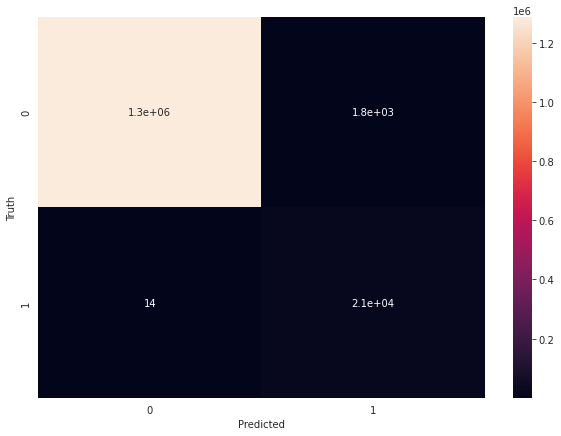

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')